In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [44]:
#Implementing UCB
import math

N = 10000
d = 10
ads_selected = []
sums_of_reward = [0] * d
numbers_of_selection = [0] * d
total_reward = 0
for n in range (N): 
  ad = 0
  max_upper_bound = 0
  for i in range (d):
    if (numbers_of_selection[i] > 0):     
      average_reward = sums_of_reward[i] / numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selection[i])
      upper_bound = average_reward + delta_i
    else:
       upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  numbers_of_selection[ad] += 1
  reward = dataset.values[n,ad]
  sums_of_reward[ad] += reward
  total_reward += reward

Streaming output truncated to the last 5000 lines.
0.11748633879781421
0.03804347826086957
0.10670731707317073
0.2638370118845501
0.006756756756756757
0.09154929577464789
0.20241171403962102
0.07874015748031496
0.03804347826086957
0.17118402282453637
0.11748633879781421
0.03804347826086957
0.10670731707317073
0.2637922254286199
0.006756756756756757
0.09154929577464789
0.20241171403962102
0.07874015748031496
0.03804347826086957
0.17118402282453637
0.11748633879781421
0.03804347826086957
0.10670731707317073
0.2637474541751528
0.006756756756756757
0.09154929577464789
0.20241171403962102
0.07874015748031496
0.03804347826086957
0.17118402282453637
0.11748633879781421
0.03804347826086957
0.10670731707317073
0.2637026981164093
0.006756756756756757
0.09154929577464789
0.20241171403962102
0.07874015748031496
0.03804347826086957
0.17118402282453637
0.11748633879781421
0.03804347826086957
0.10670731707317073
0.2638276213098066
0.006756756756756757
0.09154929577464789
0.20241171403962102
0.0787401

In [45]:
print(total_reward)

2178


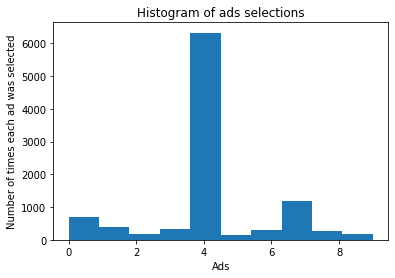

In [36]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()